# 04: Visualizations

Generate charts and visualizations for the analysis.


In [1]:
import sys
from pathlib import Path

# Add src to path - robust path resolution for notebooks
# In Jupyter, cwd is usually the project root, not notebooks/
current_dir = Path.cwd()

# Check if we're in notebooks/ directory or at project root
if current_dir.name == 'notebooks':
    project_root = current_dir.parent
elif (current_dir / 'config.yml').exists():
    # We're already at project root
    project_root = current_dir
else:
    # Try to find project root by looking for config.yml
    project_root = current_dir
    while project_root != project_root.parent:
        if (project_root / 'config.yml').exists():
            break
        project_root = project_root.parent

sys.path.insert(0, str(project_root))

import pandas as pd
import matplotlib.pyplot as plt
from src.viz.plots import (
    plot_cumulative_returns,
    plot_drawdown,
    plot_rolling_metric,
    plot_rolling_alpha_beta,
    plot_correlation_matrix,
)
from src.analytics.performance_metrics import calculate_rolling_sharpe
from src.analytics.risk import calculate_drawdown_series
from src.analytics.regression import calculate_rolling_alpha_beta
from src.utils.paths import get_data_interim_path


In [2]:
# Load data
interim_path = get_data_interim_path()
returns_df = pd.read_csv(interim_path / "returns_merged.csv", parse_dates=["date"])
returns_df = returns_df.set_index("date")

varbx_returns = returns_df["return_varbx"]
sp500_returns = returns_df["return_sp500"]
agg_returns = returns_df["return_agg"]


## Cumulative Returns


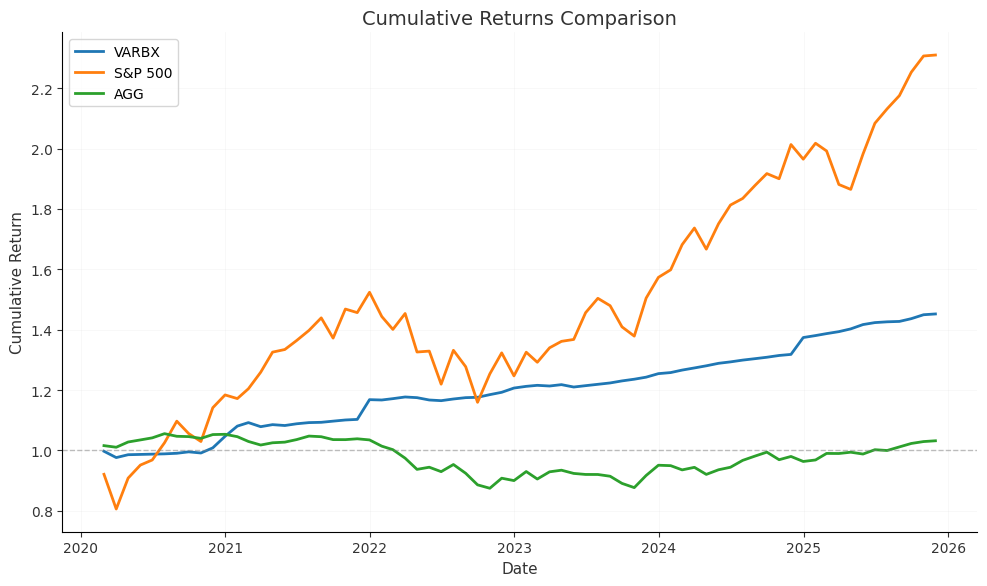

In [3]:
# Plot cumulative returns
returns_dict = {
    "VARBX": varbx_returns,
    "S&P 500": sp500_returns,
    "AGG": agg_returns
}
fig = plot_cumulative_returns(returns_dict, title="Cumulative Returns Comparison")
plt.show()


## Drawdown Chart


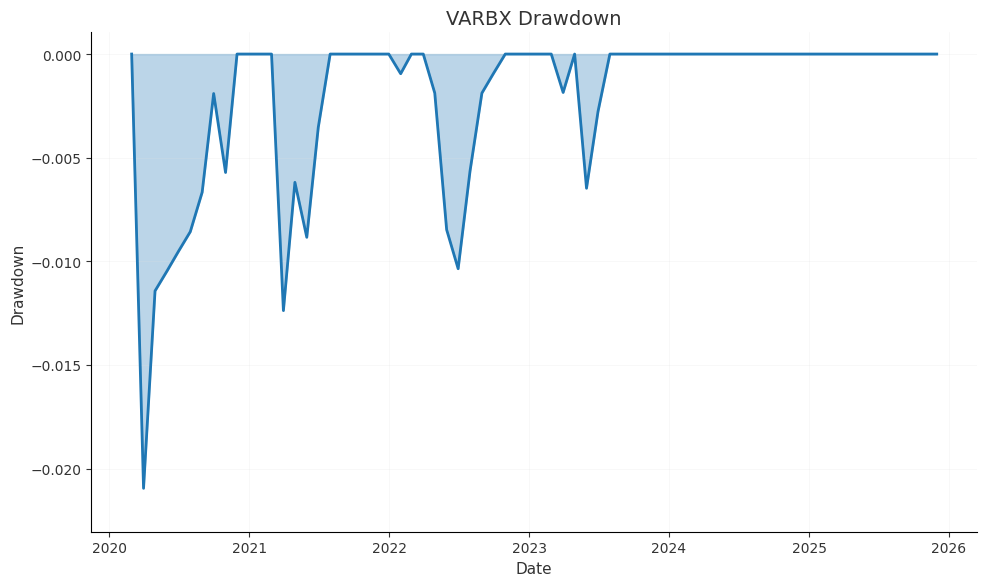

In [4]:
# Plot drawdown
varbx_drawdown = calculate_drawdown_series(varbx_returns)
fig = plot_drawdown(varbx_drawdown, title="VARBX Drawdown")
plt.show()


## Rolling Metrics


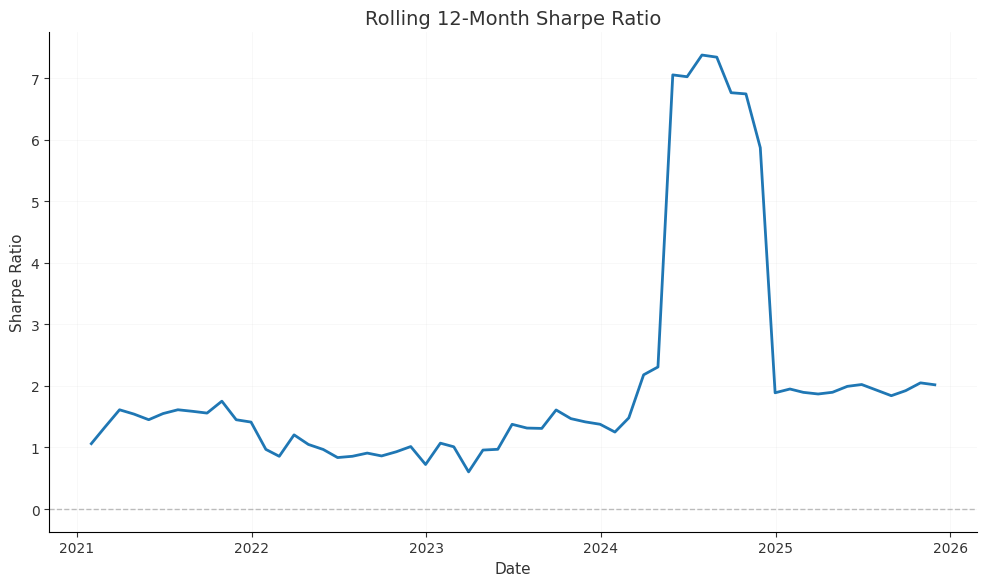

In [5]:
# Plot rolling Sharpe ratio
rolling_sharpe = calculate_rolling_sharpe(varbx_returns, window=12)
fig = plot_rolling_metric(
    rolling_sharpe,
    title="Rolling 12-Month Sharpe Ratio",
    ylabel="Sharpe Ratio"
)
plt.show()


## Correlation Matrix


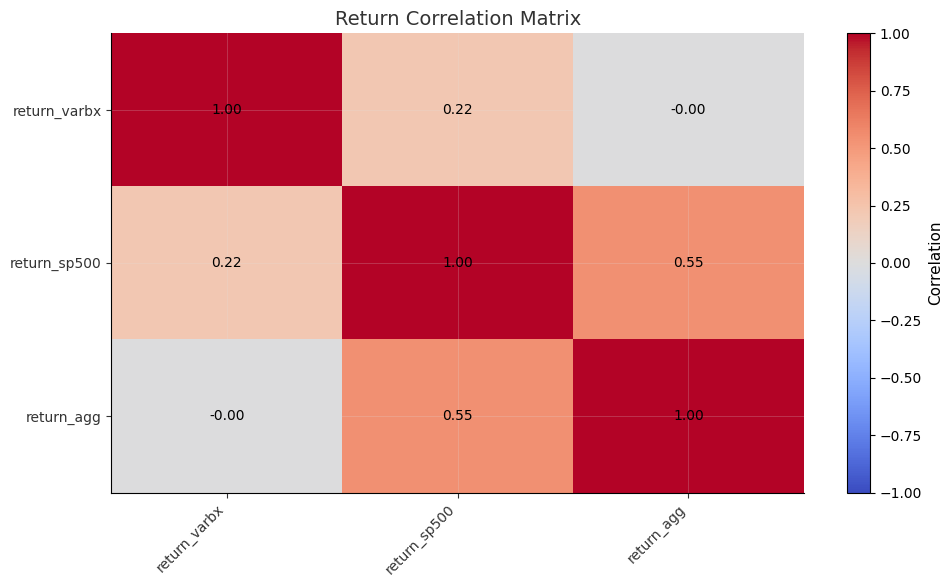

In [6]:
# Plot correlation matrix
returns_only = returns_df[["return_varbx", "return_sp500", "return_agg"]]
fig = plot_correlation_matrix(returns_only, title="Return Correlation Matrix")
plt.show()
